In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('movies.csv')

In [ ]:
# chnage the column name
df.columns = df.columns.str.capitalize()

In [ ]:
def clean_year_1(df):
  df['Year'] = df['Year'].str.lower()
  df['Year'] = df['Year'].fillna('Missing')

  df['Year'] = df['Year'].str.replace('(', '')
  df['Year'] = df['Year'].str.replace(')', '')

  df['Year'] = df['Year'].str.strip() # remove trailing white spaces
  df['Year'] = df['Year'].str.strip('–') # remove trailing '-'


In [ ]:
def clean_year_2(s):
  target = [chr(x) for x in range(ord('a'), ord('z')+1)]
  target.append(' ')

  if s == '':
      return 'Missing'

  if s != "Missing":
    for s_character in s:
      if s_character in target:
        s = s.replace(s_character, '')

  return s

In [ ]:
clean_year_1(df)

In [ ]:
clean_year_1(df)
df['Year']  = df['Year'].apply(clean_year_2)

In [ ]:
df.head()

,Movies,Year,Genre,Rating,One-line,Stars,Votes,Runtime,Gross
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,2010–2022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [ ]:
# clean Genre and Stars columns

def clean_stars_genre(df):
  df['Genre'] = df['Genre'].str.replace('\n', '')
  df['Stars'] = df['Stars'].str.replace('\n', '')


clean_stars_genre(df)

In [ ]:
def clean_votes(df):
  df['Votes'] = df['Votes'].fillna('0')
  df['Votes'] = df['Votes'].str.strip()
  df['Votes'] = df['Votes'].str.replace(',', '')
  df['Votes'] = df['Votes'].astype(int)


clean_votes(df)

### VISUALIZING SOME SELECTED COLUMNS

In [ ]:
df.columns

Index(['Movies', 'Year', 'Genre', 'Rating', 'One-line', 'Stars', 'Votes',
       'Runtime', 'Gross'],
      dtype='object')

In [ ]:
clean_df =  df[['Movies', 'Year', 'Genre', 'Stars', 'Votes', 'Runtime']]

In [ ]:
clean_df.head()

,Movies,Year,Genre,Stars,Votes,Runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",Director:Peter Thorwarth| Stars:Peri B...,21062,121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure","Stars:Chris Wood, Sarah Michel...",17870,25.0
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller","Stars:Andrew Lincoln, Norman R...",885805,44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy","Stars:Justin Roiland, Chris Pa...",414849,23.0
4,Army of Thieves,2021,"Action, Crime, Horror",Director:Matthias Schweighöfer| Stars:...,0,NaN


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
# top 5 Year with highest movies production
top_5_movies_year = clean_df['Year'].value_counts()[:5]

In [ ]:
top_5_movies_year

,count
Year,
2020,1640
2019,1210
2021,1117
2018,876
2017,664


In [ ]:
top_5_movies_year.index

Index(['2020', '2019', '2021', '2018', '2017'], dtype='object', name='Year')

In [ ]:
top_5_movies_year.values

array([1640, 1210, 1117,  876,  664])

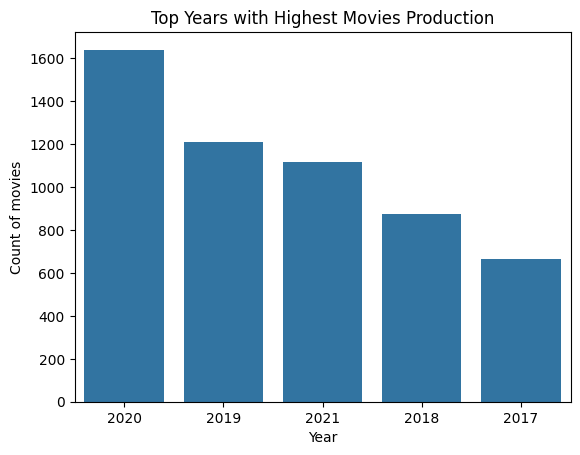

In [ ]:
sns.barplot(x=top_5_movies_year.index, y=top_5_movies_year.values)

plt.title("Top Years with Highest Movies Production")
plt.ylabel("Count of movies")

plt.show()

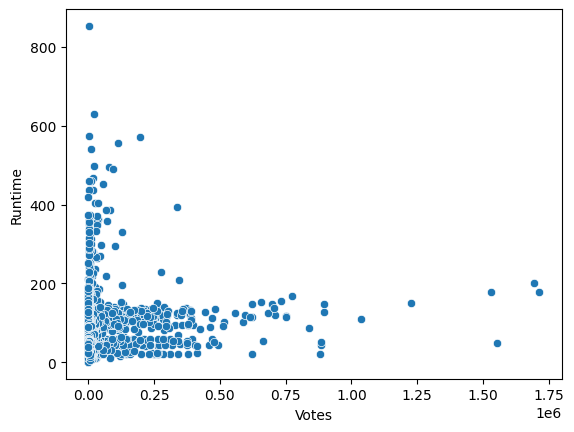

In [ ]:
sns.scatterplot(x=clean_df['Votes'], y=clean_df['Runtime'])

plt.show()

In [ ]:
votes_runtime_correlation_coef = clean_df[['Votes', 'Runtime']].corr()

votes_runtime_correlation_coef

,Votes,Runtime
Votes,1.000000,0.145142
Runtime,0.145142,1.000000


<Axes: >

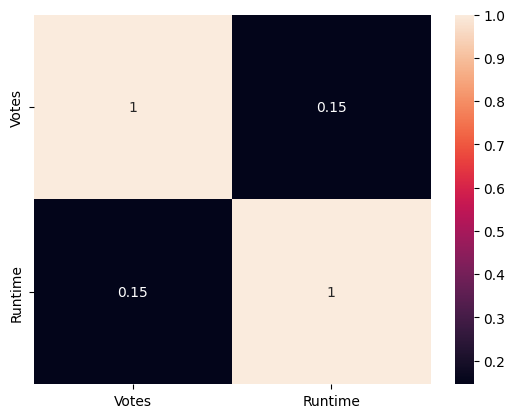

In [ ]:
sns.heatmap(votes_runtime_correlation_coef, annot=True)